In [6]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [8]:
df=pd.read_excel('unsupervised.xlsx')
df.head()

,Name,Age,Income
0,Rob,27,70000
1,Michel,29,90000
2,Magesh,29,61000
3,Anisha,28,60000
4,Varsha,42,150000


In [9]:
km=KMeans(n_clusters=3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

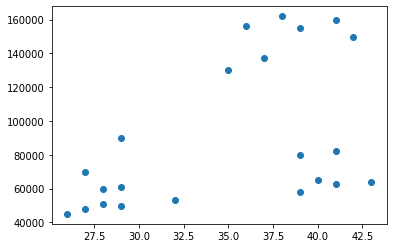

In [10]:
plt.scatter(df.Age,df.Income)

In [13]:
mm=MinMaxScaler()
mm.fit(df[['Income']])
df['Income']=mm.transform(df[['Income']])

mm.fit(df[['Age']])
df['Age']=mm.transform(df[['Age']])

In [16]:
target=km.fit_predict(df[['Age','Income']])
df['Cluster']=target
df.head()

,Name,Age,Income,Cluster
0,Rob,0.058824,0.213675,1
1,Michel,0.176471,0.384615,1
2,Magesh,0.176471,0.136752,1
3,Anisha,0.117647,0.128205,1
4,Varsha,0.941176,0.897436,0


No handles with labels found to put in legend.


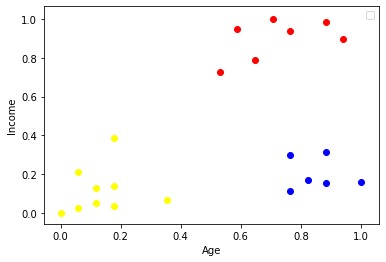

In [41]:
df0=df[df.Cluster==0]
df1=df[df.Cluster==1]
df2=df[df.Cluster==2]

plt.scatter(df0['Age'],df0['Income'],color='red')
plt.scatter(df1['Age'],df1['Income'],color='yellow')
plt.scatter(df2['Age'],df2['Income'],color='blue')

plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()


In [42]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

No handles with labels found to put in legend.


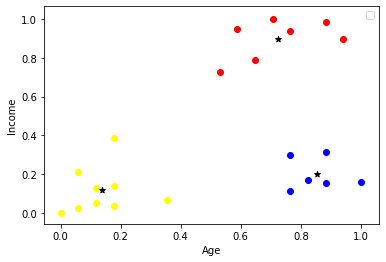

In [45]:
df0=df[df.Cluster==0]
df1=df[df.Cluster==1]
df2=df[df.Cluster==2]

plt.scatter(df0['Age'],df0['Income'],color='red')
plt.scatter(df1['Age'],df1['Income'],color='yellow')
plt.scatter(df2['Age'],df2['Income'],color='blue')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()


# LOAD IRIS

In [50]:
from sklearn.datasets import load_iris
li=load_iris()

In [51]:
dir(li)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [54]:
df=pd.DataFrame(li.data,columns=li.feature_names)
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [55]:
target=km.fit_predict(df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']])
target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [59]:
df['target']=target
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1


No handles with labels found to put in legend.


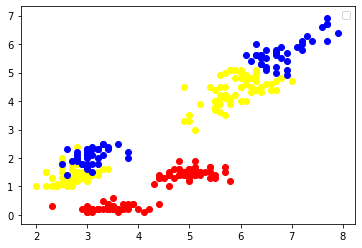

In [64]:
df0=df[df['target']==0]
df1=df[df['target']==1]
df2=df[df['target']==2]

plt.scatter(df0[['sepal length (cm)','sepal width (cm)']],df0[['petal length (cm)','petal width (cm)']],color='yellow')
plt.scatter(df1[['sepal length (cm)','sepal width (cm)']],df1[['petal length (cm)','petal width (cm)']],color='red')
plt.scatter(df2[['sepal length (cm)','sepal width (cm)']],df2[['petal length (cm)','petal width (cm)']],color='blue')

plt.legend()

In [65]:
k_rng=range(1,10)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']])
    sse.append(km.inertia_)

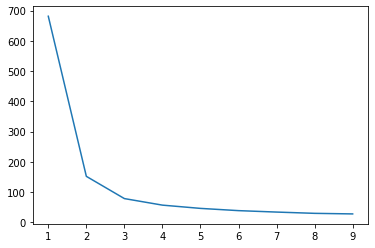

In [68]:
plt.plot(k_rng,sse)
#3 is best clus